In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.drop(['ID'],axis=1, inplace=True)
x = df.drop(['Personal Loan'],axis=1)
y = df['Personal Loan']

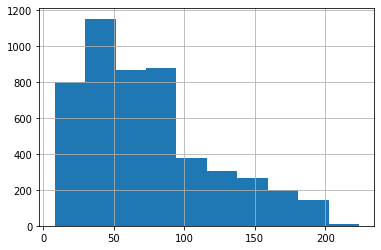

In [6]:
df['Income'].hist()

#### AdaBoostClassifier

In [7]:
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'train_test_split_test_split' from 'sklearn.model_selection' (C:\Users\Saurabh\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
result=[]
for i in range(10):
    clf = AdaBoostClassifier(n_estimators=100,learning_rate=0.1*i+0.1).fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    result.append([i*0.1,accuracy_score(y_test, y_pred)])
result_df = pd.DataFrame(result)
result_df.columns=['learning_rate','accuracy']
plt.plot(result_df.learning_rate,result_df.accuracy)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('AdaBoost Classifier')
plt.show()

In [ ]:
optimum_val = min(result_df[result_df.accuracy == max(result_df.accuracy)].learning_rate)
print(optimum_val)

In [ ]:
clf = AdaBoostClassifier(n_estimators=100,learning_rate=optimum_val).fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sns
sns.heatmap(matrix,annot=True)


In [ ]:
sns.heatmap(matrix/np.sum(matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))